# STA 141B Final Project: 
# Investigating Cryptocurrency Through Data Analysis

### By Rick Alarcon and Adam Atamian

## What is Cryptocurrency? 

## It is more than just Bitcoin!


## It is a digital asset designed to work as a medium of exchange that uses cryptography to secure its transactions, to control the creation of additional units, and to verify the transfer of assets.

### Buzzwords Rundown:
###### - Blockchain: a continuously growing list of records, called blocks, which are linked and secured using cryptography. Each block typically contains a cryptographic hash of the previous block, a timestamp and transaction data.
##### - Decentralization: simply put there are multiple points that do the work, most cryptos follow this ideology.
##### - Mining: a validation of transactions usually through specialized machines with the reward being new cryptocurrency (this is what has caused GPU prices to dramatically increase).
##### - Alt Coins: most cryptos are alternative coins, and as of January 2018, there were over 1384 and growing digital currencies in existence. Some perform better than the Bitcoin due to new technological developments, but Bitcoin still reigns on top due to its popularity. 


## Why Analyze Cryptocurrency?

### - General curiosity towards a new digital frontier that combines finance, currency, and technology.
### - Currently holding various cryptocurrencies.
### - Want to get a better picture of how cryptocurrencies fluxuate and are viewed by the public.


## Questions We Are Investigating:

##### - Are alternative coins tied to Bitcoin movements?
##### - Are cryptocurrecy trends related to the stock market?
##### - What cryptocurrencies are talked about the most?
##### - Which top cryptocurrencies have been the biggest gainers and losers?

### Where Does The Data Come From?

#### Reddit.com, Python Reddit API Wrapper (PRAW)
- In February 2016 Reddit had 36 million user accounts, 231 million unique monthly visits, and 11,464 active communities. Source: https://expandedramblings.com/index.php/reddit-stats/
- A study showed that 80% of Reddit users get their news from the site. Source: http://www.journalism.org/2016/02/25/seven-in-ten-reddit-users-get-news-on-the-site/

#### CryptoCompare.com API
- Compiles various cryptocurrency data including live prices, trades, volumes, etc.

#### Yahoo Finance
- Data from the S&P 500 stock market compiled into a CSV file.

In [82]:
import rise
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
# Python Reddit API Wrapper
import praw

reddit = praw.Reddit(client_id='FXuNKQYfYDWEdQ',
                     client_secret='vIa43NLdS3tehHvNdlYBInttGQg',
                     user_agent='PleaseGiveGoodGrade')

print(reddit.read_only)

True


In [48]:
# Function that searchs a subreddit by popularity, reddit calls it 'hot' which is the posts with the most upvotes recently.
def reddit_hotsearcher(subreddit):
    return [submission.title for submission in reddit.subreddit(subreddit).hot(limit=None)]

In [47]:
# Search r/cryptocurrencey subreddit
hotcrypto = reddit_hotsearcher('cryptocurrency')
hotcrypto

['Daily General Discussion - March 16, 2018',
 'Weekly Skeptics Discussion - March 11, 2018',
 'Congressman admitted that they are afraid to ‘lose control’ over the people due to crypto.',
 'Why public presales are usually a joke',
 'The reddit Android app changed its title to "Reddit: Top News, Trending Memes & Crypto Updates"',
 'Coinbase Tells Congress We Need Clarity Not More Regulators',
 'His bags are heavy...',
 'California Rep. Sherman badmouthing Cryptocurrencies is funded by a payment processor whose business is at risk. Not to mention the company was busted for money laundering.',
 'Lightning Network Released On Mainnet',
 'Always Think Long Term. Bitcoin Was Once $0.06. Not Cool, Unpopular And Unsafe.',
 'When your crypto is down 80% and someone tells you, "See I told you".',
 'Friendly reminder',
 'The Benefits of Universal Blocks (Nano)',
 'NEO block generation time down to 13.6 seconds average due to consensu nodes update! Gas generation up 40% !!!',
 'Relax everyone. Th

In [5]:
# Searches for matches to terms from subreddit results.
def add_match(data, terms):
    results = sum(terms in title.lower() for title in data)
    return results

In [6]:
# Top 10 cryptocurrencies ranked by market capitalization.
# Market Capitalization is a common way to rank the relative size of a cryptocurrency. 
# It's calculated by multiplying the Price by the Circulating Supply. 
# Search from 'hot' posts from r/cryptocurrency with top 10 cryptos in the title and add results. Full name and abbrevation are used.

bitcoin = add_match(hotcrypto, 'btc') + add_match(hotcrypto, 'bitcoin') 
ethereum = add_match(hotcrypto, 'eth') + add_match(hotcrypto, 'ethereum')
ripple = add_match(hotcrypto, 'xrp') + add_match(hotcrypto, 'ripple')
bitcoin_cash = add_match(hotcrypto, 'bch') + add_match(hotcrypto, 'bitcoin cash')
litecoin = add_match(hotcrypto, 'ltc') + add_match(hotcrypto, 'litecoin')
neo = add_match(hotcrypto, 'neo') + add_match(hotcrypto, 'neo')
cardano = add_match(hotcrypto, 'ada') + add_match(hotcrypto, 'cardano')
stellar = add_match(hotcrypto, 'xlm') + add_match(hotcrypto, 'stellar')
monero = add_match(hotcrypto, 'xmr') + add_match(hotcrypto, 'monero')
eos = add_match(hotcrypto, 'eos') + add_match(hotcrypto, 'eos')

top10 = [bitcoin, ethereum, ripple, bitcoin_cash, litecoin, neo, cardano, stellar, monero, eos]

In [7]:
# Search r/news subreddit
hotnews = reddit_hotsearcher('news')
hotnews

['WEST MIAMI-DADE - FIU pedestrian bridge collapses, people trapped underneath',
 'Pennsylvania High School to Issue Over 200 Detentions to Students That Took Part in Protest',
 'Trump decides to remove national security adviser, and others may follow',
 'Ariz. teacher posts salary on Facebook, fueling teacher pay discussion',
 'Donald Trump Jr. and Vanessa Trump are separating',
 'Latest Flint Water Samples Show Increase in Lead Levels',
 'Grand Blanc school locks doors to avoid student walkout over gun violence',
 'US troops who repelled Russian mercenaries prepare for more attacks',
 'Parkland surveillance video shows officer standing outside school during shooting',
 "Fox News sued over murder conspiracy 'sham'",
 'In joint statement, world leaders agree Russia behind nerve agent attack on former spy',
 '30,000 jobs will be lost after Toys R Us shuts down',
 'Arkansas Students Paddled For Participating in Walkout',
 'Officials: NYPD officer took part in heroin trafficking ring',
 '

In [8]:
# Same as before but 10 ten cryptos mentioned from the r/news subreddit.
bitcoinn = add_match(hotcrypto, 'btc') + add_match(hotnews, 'bitcoin') 
ethereumn = add_match(hotcrypto, 'eth') + add_match(hotnews, 'ethereum')
ripplen = add_match(hotcrypto, 'xrp') + add_match(hotnews, 'ripple')
bitcoin_cashn = add_match(hotcrypto, 'bch') + add_match(hotnews, 'bitcoin cash')
litecoinn = add_match(hotcrypto, 'ltc') + add_match(hotnews, 'litecoin')
neon = add_match(hotcrypto, 'neo') + add_match(hotnews, 'neo')
cardanon = add_match(hotcrypto, 'ada') + add_match(hotnews, 'cardano')
stellarn = add_match(hotcrypto, 'xlm') + add_match(hotnews, 'stellar')
moneron = add_match(hotcrypto, 'xmr') + add_match(hotnews, 'monero')
eosn = add_match(hotcrypto, 'eos') + add_match(hotnews, 'eos')

top10n = [bitcoinn, ethereumn, ripplen, bitcoin_cashn, litecoinn, neon, cardanon, stellarn, moneron, eosn]

In [9]:
# Search for 'hot' posts from all subreddits combined.
hotall = reddit_hotsearcher('all')
hotall

['LeBron James posters Jusuf Nurkic',
 'Trump decides to remove national security adviser, and others may follow',
 'Boxing referee Steve Willis really loves his job',
 'TIL actress Judi Dench is growing a forest on her property in Surrey, England dedicated to loved ones in her life who have passed on. Every time a friend or relative dies, she plants a tree in their honor. She started the tradition after the death of her husband, actor Michael Williams.',
 '...damn I just wanted a lottery ticket',
 "Superfriends (Shen's Horrible Oldposting)",
 'Join the deer side',
 'A guy chilling in a random pothole filled with water.',
 'He eat. He sleep. But most importantly he hold him’s own feet.',
 'Cocky fighter gets KO’d in 9 seconds',
 '"Hey gurl, would you like to get into a... sticky situation?"',
 'That Viral Story About Scott Kelly\'s Genes Changing in Space is Wrong: “Scott’s DNA did not fundamentally change. What researchers did observe are changes in gene expression."',
 'ULPT: If you’

In [10]:
# Same as before but for every post that is 'hot'

bitcoina = add_match(hotcrypto, 'btc') + add_match(hotall, 'bitcoin') 
ethereuma = add_match(hotcrypto, 'eth') + add_match(hotall, 'ethereum')
ripplea = add_match(hotcrypto, 'xrp') + add_match(hotall, 'ripple')
bitcoin_casha = add_match(hotcrypto, 'bch') + add_match(hotall, 'bitcoin cash')
litecoina = add_match(hotcrypto, 'ltc') + add_match(hotall, 'litecoin')
neoa = add_match(hotcrypto, 'neo') + add_match(hotall, 'neo')
cardanoa = add_match(hotcrypto, 'ada') + add_match(hotall, 'cardano')
stellara = add_match(hotcrypto, 'xlm') + add_match(hotall, 'stellar')
moneroa = add_match(hotcrypto, 'xmr') + add_match(hotall, 'monero')
eosa = add_match(hotcrypto, 'eos') + add_match(hotall, 'eos')

top10a = [bitcoina, ethereuma, ripplea, bitcoin_casha, litecoina, neoa, cardanoa, stellara, moneroa, eosa]

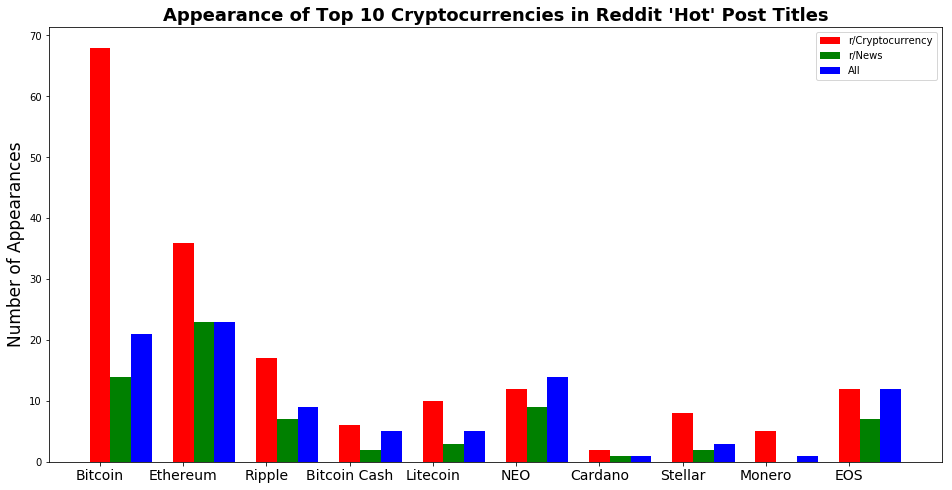

In [11]:
top10names = 'Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin', 'NEO', 'Cardano', 'Stellar', 'Monero', 'EOS'
y_pos = np.arange(len(top10))

plt.figure(figsize=(16,8))
plt.bar(y_pos + 0.00, top10, color = 'r', width = 0.25, label='r/Cryptocurrency')
plt.bar(y_pos + 0.25, top10n, color = 'g', width = 0.25, label='r/News')
plt.bar(y_pos + 0.50, top10a, color = 'b', width = 0.25, label='All')

plt.xticks(y_pos, top10names, size=14)
plt.ylabel('Number of Appearances', size=17)
plt.title("Appearance of Top 10 Cryptocurrencies in Reddit 'Hot' Post Titles",fontweight='bold', size=18)
plt.legend(loc='upper right')
plt.show()       

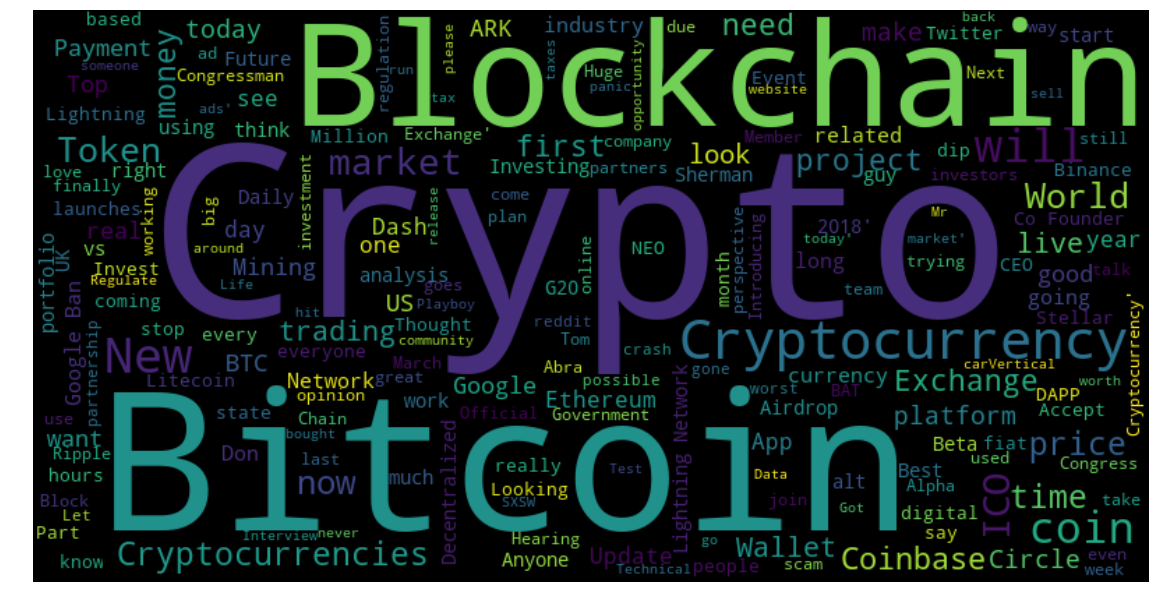

In [41]:
# Create Word Cloud
from wordcloud import WordCloud, STOPWORDS

hotcryptowords = str(hotcrypto) #Turns hot crypto results into one big string so it can be read into a word cloud.

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=410, background_color="black", stopwords=stopwords).generate(hotcryptowords)

plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 